Import Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

upload dataset and concat

In [30]:
df1=pd.read_csv(r"C:\Users\balak\guvi\singapore\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"C:\Users\balak\guvi\singapore\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\balak\guvi\singapore\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"C:\Users\balak\guvi\singapore\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv(r"C:\Users\balak\guvi\singapore\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [31]:
df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
925884,2024-04,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,900000.0,62 years 10 months
925885,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62 years 10 months
925886,2024-05,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,948000.0,62 years 09 months
925887,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months


Clean dataset

Remove Duplicates

In [32]:
df=df.drop_duplicates()
df.shape

(923993, 11)

Missing values

In [33]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        707463
dtype: int64

In [34]:
# out of 923993 datas  707463 datas are null so deleting the column
del df['remaining_lease']

In [35]:
#spliting year and month
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

In [36]:
df.drop('month', axis = 1, inplace= True)

In [37]:
df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,01


Datatype conversion

In [38]:
df.dtypes

town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
resale_year             object
resale_month            object
dtype: object

In [39]:
df['resale_year']=df['resale_year'].astype(int)
df['resale_month']=df['resale_month'].astype(int)


In [40]:
df.dtypes

town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
resale_year              int32
resale_month             int32
dtype: object

categorical column

In [ ]:
cat_col=cat_col = df.select_dtypes(include=['object','datetime64[ns]']).columns
cat_col

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model'],
      dtype='object')

continous column

In [41]:
cont_col=cat_col = df.select_dtypes(exclude=['object','datetime64[ns]']).columns
cont_col

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price', 'resale_year',
       'resale_month'],
      dtype='object')

Checking skewness and outliers

In [ ]:
from scipy.stats import skew
for column in cont_col:
  print(f"Column : {column}")
  skewness = skew(df[column])
  print("Skewness:", skewness)

  print("*******************")

Column : floor_area_sqm
Skewness: 0.3659319065447902
*******************
Column : lease_commence_date
Skewness: 0.644834072268593
*******************
Column : resale_price
Skewness: 0.9398336457529527
*******************
Column : resale_year
Skewness: 0.2946207357772624
*******************
Column : resale_month
Skewness: -0.029391802450814068
*******************


In [ ]:
#checking outlier
for column in cont_col:

    print(f"Column : {column}")
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
    print(f"UpperThreshold : {upper_threshold} and lowerThreshold : {lower_threshold}")

    print(df[column].describe())
    print('**********************')

Column : floor_area_sqm
UpperThreshold : 173.0 and lowerThreshold : 13.0
count    923993.000000
mean         95.715761
std          25.824518
min          28.000000
25%          73.000000
50%          93.000000
75%         113.000000
max         307.000000
Name: floor_area_sqm, dtype: float64
**********************
Column : lease_commence_date
UpperThreshold : 2018.5 and lowerThreshold : 1958.5
count    923993.000000
mean       1988.266597
std          10.646074
min        1966.000000
25%        1981.000000
50%        1986.000000
75%        1996.000000
max        2022.000000
Name: lease_commence_date, dtype: float64
**********************
Column : resale_price
UpperThreshold : 753000.0 and lowerThreshold : -143000.0
count    9.239930e+05
mean     3.204887e+05
std      1.700796e+05
min      5.000000e+03
25%      1.930000e+05
50%      2.970000e+05
75%      4.170000e+05
max      1.568888e+06
Name: resale_price, dtype: float64
**********************
Column : resale_year
UpperThreshold : 20

In [ ]:
def plot(df,column):
  #boxplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.boxplot(x=df[column], color='skyblue')
  plt.xlabel(column)
  plt.title("Box Plot of "+" "+column)

  #distplot

  plt.subplot(1,3,2)
  sns.distplot(df[column],kde=True,color='blue')
  plt.xlabel(column)
  plt.ylabel("count")
  plt.title("Distplot for"+" "+column)

  #violinplot

  plt.subplot(1,3,3)
  sns.violinplot(data=df, x=column)
  plt.title("violin plot for"+" "+column)

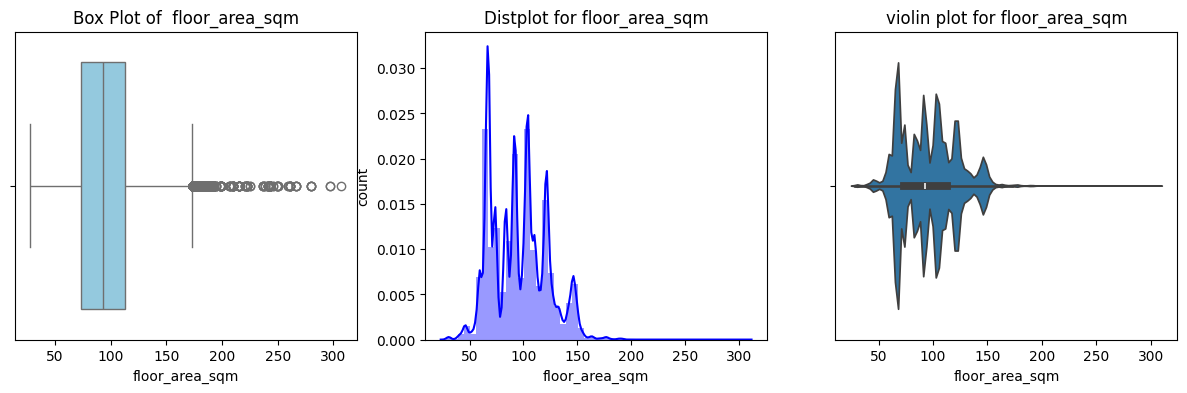

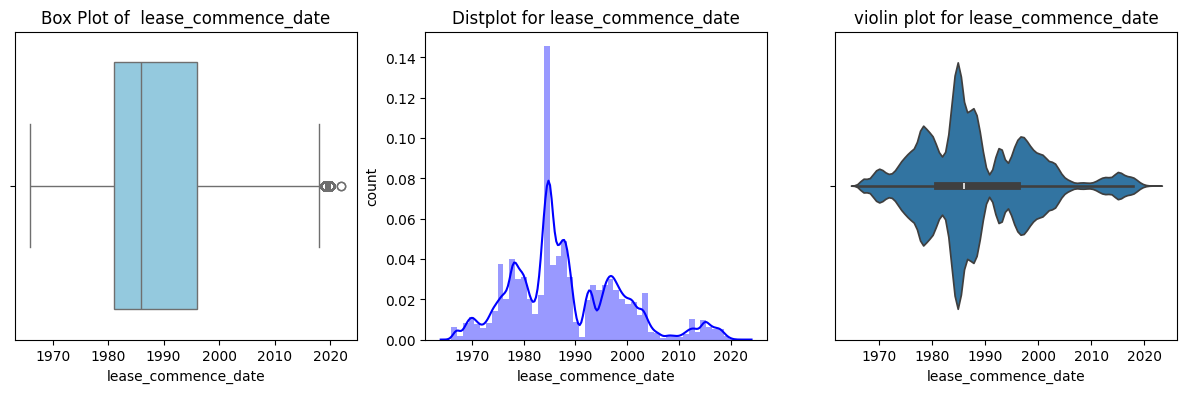

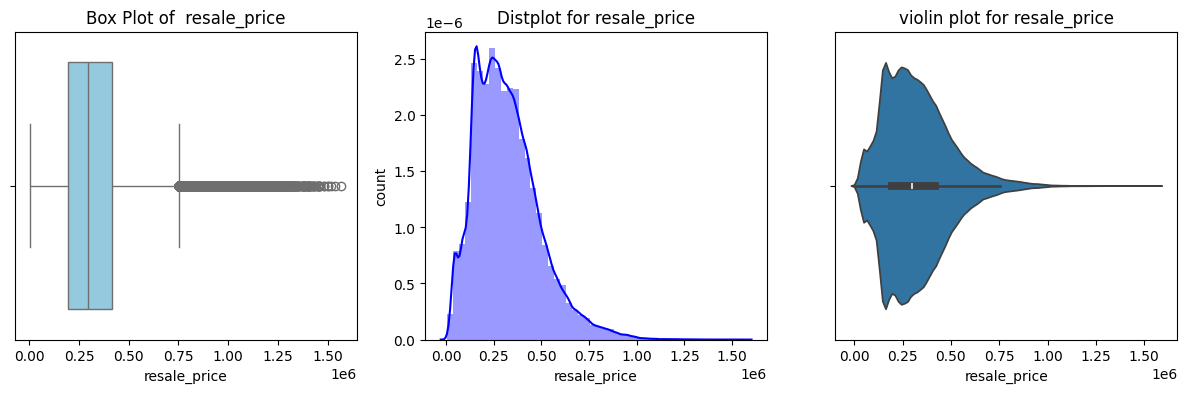

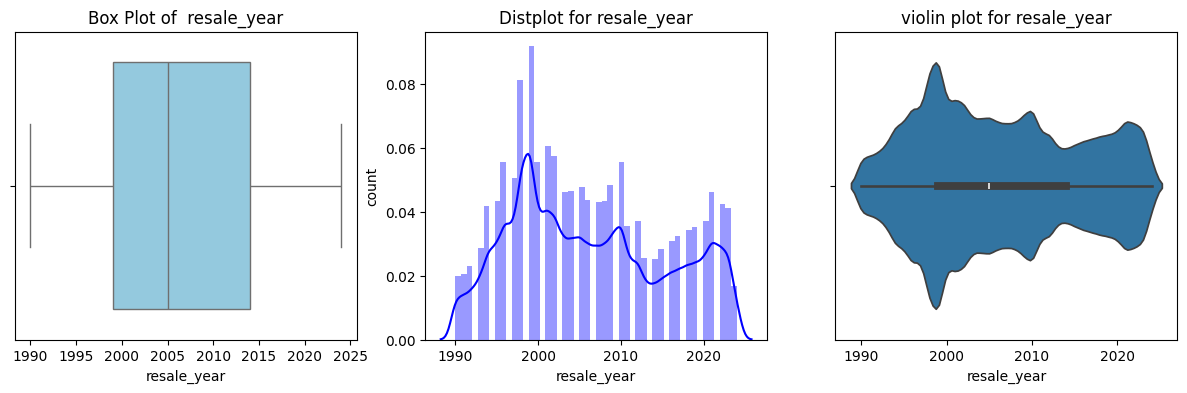

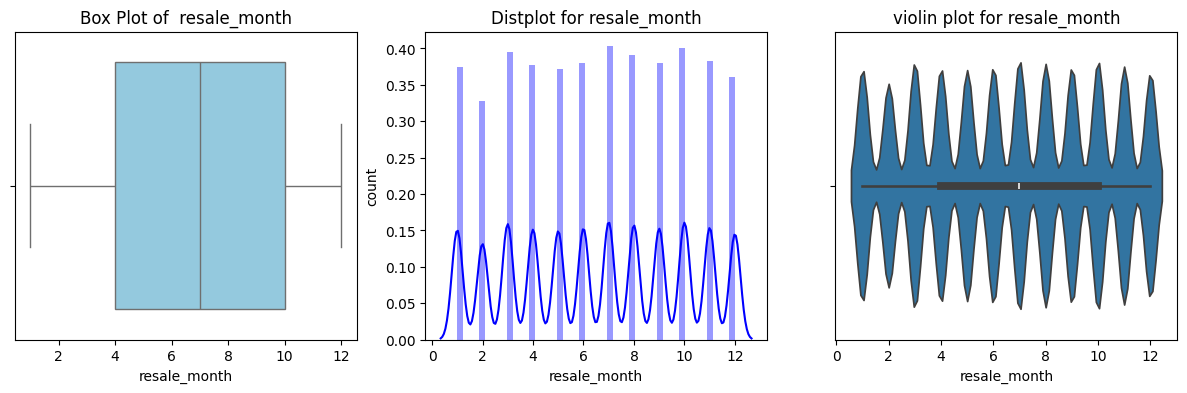

In [ ]:
for i in cont_col:
  plot(df,i)

Removing outliers

In [42]:
for column in cont_col:

    print(f"Column : {column}")
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
    print(f"UpperThreshold : {upper_threshold} and lowerThreshold : {lower_threshold}")
    df[column] = df[column].clip(lower_threshold, upper_threshold)

    print(df[column].describe())
    print('**********************')

Column : floor_area_sqm
UpperThreshold : 173.0 and lowerThreshold : 13.0
count    923993.000000
mean         95.687882
std          25.726212
min          28.000000
25%          73.000000
50%          93.000000
75%         113.000000
max         173.000000
Name: floor_area_sqm, dtype: float64
**********************
Column : lease_commence_date
UpperThreshold : 2018.5 and lowerThreshold : 1958.5
count    923993.000000
mean       1988.264851
std          10.641043
min        1966.000000
25%        1981.000000
50%        1986.000000
75%        1996.000000
max        2018.500000
Name: lease_commence_date, dtype: float64
**********************
Column : resale_price
UpperThreshold : 753000.0 and lowerThreshold : -143000.0
count    923993.000000
mean     318180.931111
std      162661.998900
min        5000.000000
25%      193000.000000
50%      297000.000000
75%      417000.000000
max      753000.000000
Name: resale_price, dtype: float64
**********************
Column : resale_year
UpperThresh

In [ ]:
from scipy.stats import skew
for column in cont_col:
  print(f"Column : {column}")
  skewness = skew(df[column])
  print("Skewness:", skewness)

  print("*******************")

Column : floor_area_sqm
Skewness: 0.331215773686303
*******************
Column : lease_commence_date
Skewness: 0.6421522514681559
*******************
Column : resale_price
Skewness: 0.6436175303324845
*******************
Column : resale_year
Skewness: 0.2946207357772624
*******************
Column : resale_month
Skewness: -0.029391802450814068
*******************


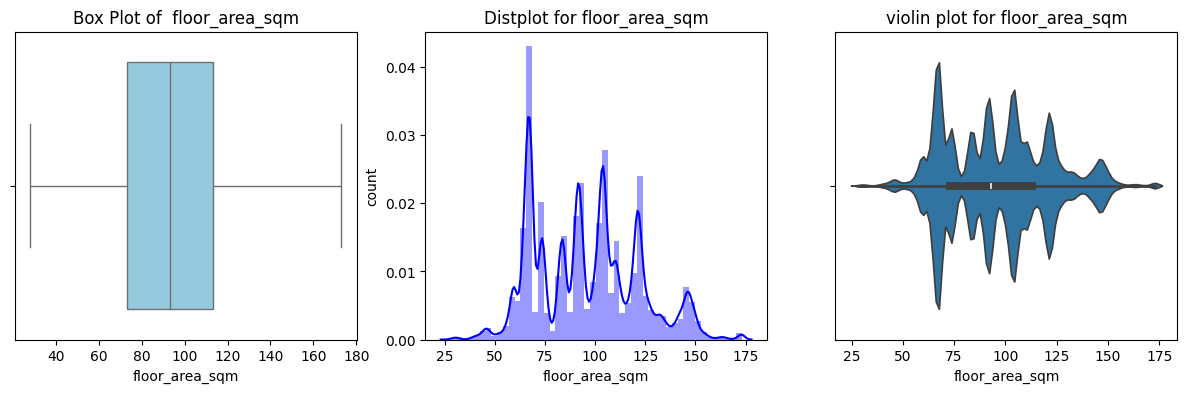

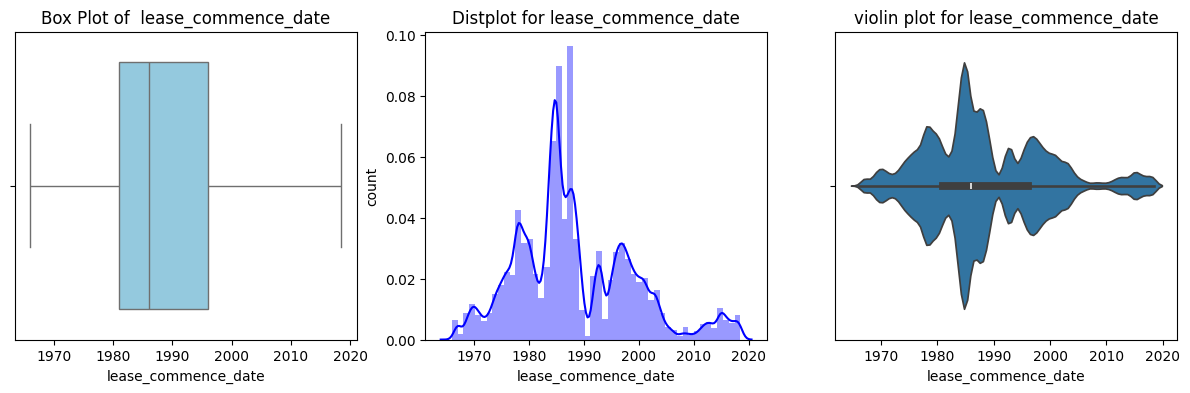

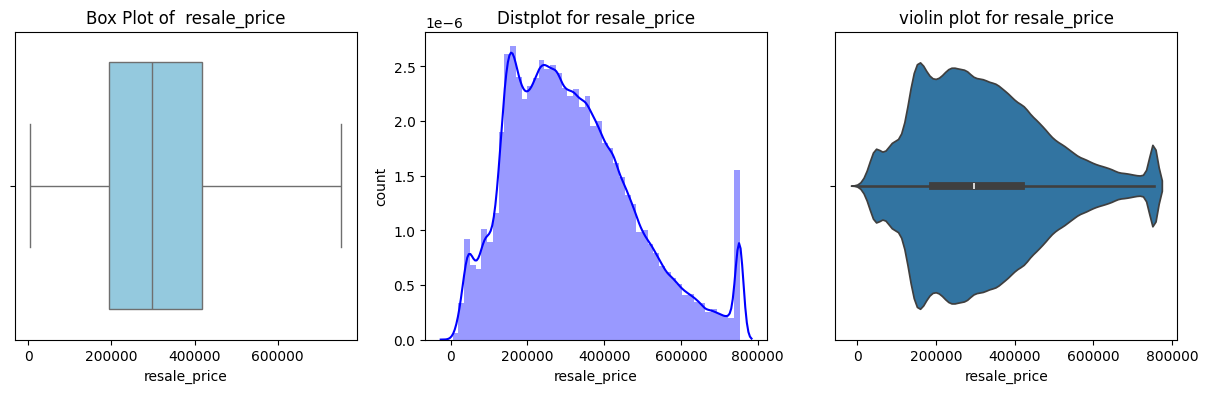

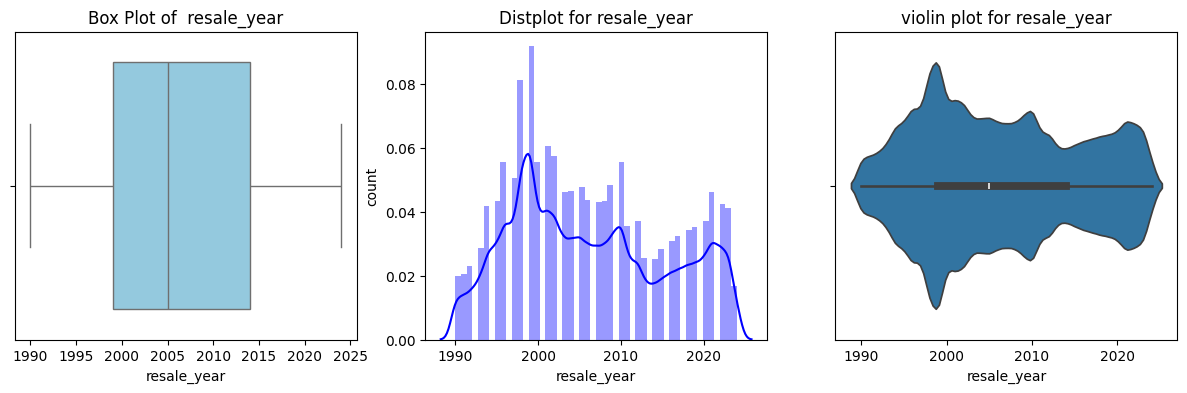

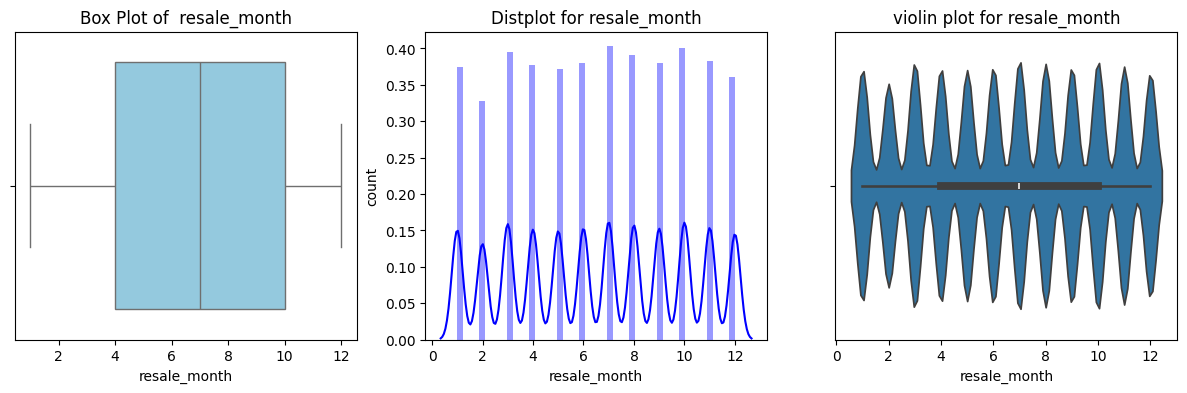

In [ ]:
for i in cont_col:
  plot(df,i)

EDA

<Axes: >

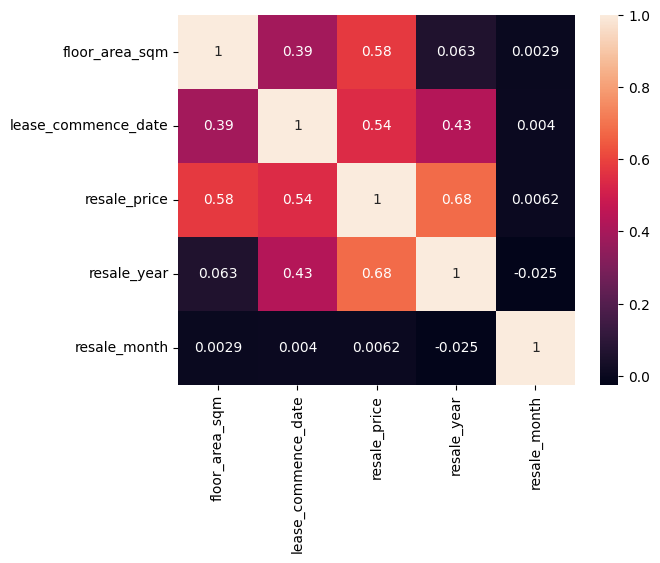

In [ ]:
sns.heatmap(df[cont_col].corr(), annot=True)

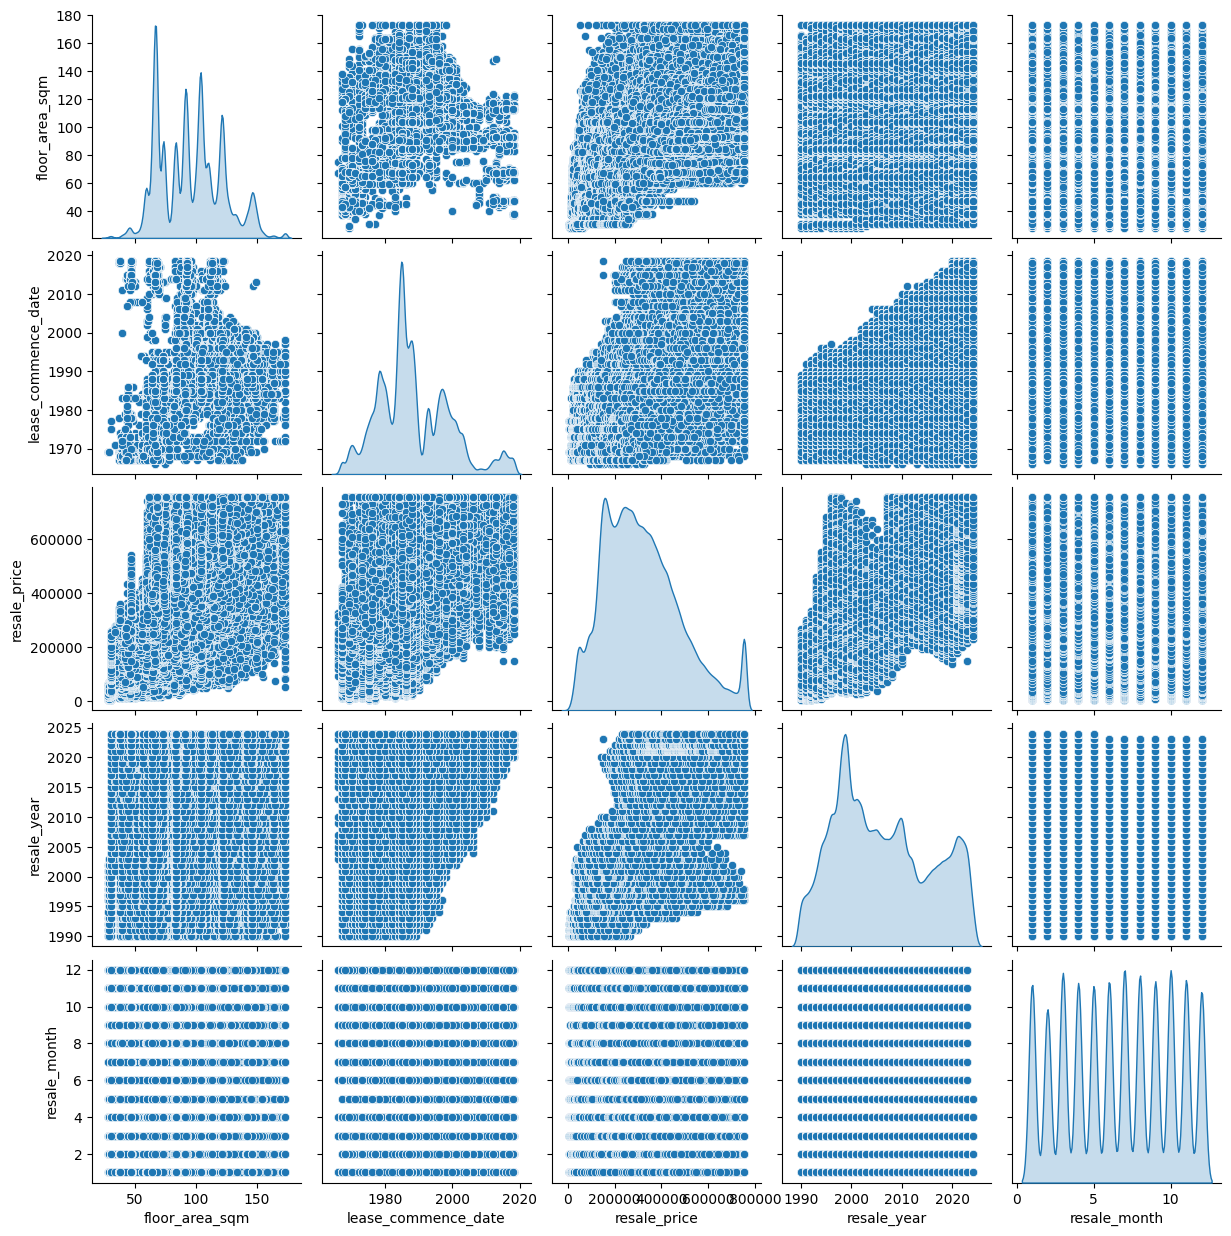

In [ ]:
sns.pairplot(df,diag_kind='kde')

Checking unique values and replacing


In [15]:
#nunique values
for i in df.columns:
  print(i,":",df[i].nunique())

town : 27
flat_type : 8
block : 2708
street_name : 584
storey_range : 25
floor_area_sqm : 168
flat_model : 34
lease_commence_date : 54
resale_price : 8482
resale_year : 35
resale_month : 12


In [ ]:
df['town'].value_counts()

town
TAMPINES           79775
YISHUN             69860
JURONG WEST        66453
BEDOK              66440
WOODLANDS          65303
ANG MO KIO         51879
HOUGANG            50610
BUKIT BATOK        44250
CHOA CHU KANG      38209
BUKIT MERAH        34244
PASIR RIS          33132
SENGKANG           32334
TOA PAYOH          31390
QUEENSTOWN         28679
GEYLANG            28075
CLEMENTI           27940
BUKIT PANJANG      27613
KALLANG/WHAMPOA    27075
JURONG EAST        24706
SERANGOON          22780
BISHAN             21219
PUNGGOL            20505
SEMBAWANG          13801
MARINE PARADE       8009
CENTRAL AREA        7134
BUKIT TIMAH         2515
LIM CHU KANG          63
Name: count, dtype: int64

In [ ]:
df['flat_type'].value_counts()

flat_type
4 ROOM              351247
3 ROOM              294732
5 ROOM              194922
EXECUTIVE            69527
2 ROOM               11749
1 ROOM                1273
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [43]:
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [ ]:
df['flat_type'].value_counts()

flat_type
4 ROOM              351247
3 ROOM              294732
5 ROOM              194922
EXECUTIVE            69527
2 ROOM               11749
1 ROOM                1273
MULTI GENERATION       543
Name: count, dtype: int64

In [ ]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17555
BEDOK RESERVOIR RD    14684
ANG MO KIO AVE 10     13758
ANG MO KIO AVE 3      12103
HOUGANG AVE 8          9343
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [ ]:
df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [ ]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [44]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [ ]:
df['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Model A-Maisonette', 'Apartment', 'Maisonette', 'Terrace',
       '2-room', 'Improved-Maisonette', 'Multi Generation',
       'Premium Apartment', 'Adjoined flat', 'Premium Maisonette',
       'Model A2', 'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft',
       '3Gen'], dtype=object)

In [ ]:
a=df['block'].unique()
unique_blocks_str = "','".join(a)
print(unique_blocks_str)

309','216','211','202','235','232','308','220','219','247','320','252','223','230','329','313','117','110','343','345','346','121','129','130','128','127','126','403','404','405','417','418','419','441','442','443','444','450','435','433','434','424','425','466','471','474','570','586','455','465','463','564','560','558','559','538','534','601','603','604','608','611','505','503','610','607','524','513','643','542','548','550','639','637','330','333','156','152','178','180','209','231','254','103','105','344','324','120','124','414','438','427','428','473','573','585','456','544','640','638','646','150','179','336','335','401','439','430','460','459','716','545','620','622','259','101','18','28','29','30','75','76','501','502','504','2','20','21','59','58','55','22','104','107','69','33','46','116','115','125','138','87','100','412','402','416','136','529','510','525','218','213','532','533','536','537','44','540','702','615','712','50','54','606','616','15','34','36','35','41','42','5

In [ ]:
unique_blocks=['309','216','211','202','235','232','308','220','219','247','320','252','223','230','329','313','117','110','343','345','346','121','129','130','128','127','126','403','404','405','417','418','419','441','442','443','444','450','435','433','434','424','425','466','471','474','570','586','455','465','463','564','560','558','559','538','534','601','603','604','608','611','505','503','610','607','524','513','643','542','548','550','639','637','330','333','156','152','178','180','209','231','254','103','105','344','324','120','124','414','438','427','428','473','573','585','456','544','640','638','646','150','179','336','335','401','439','430','460','459','716','545','620','622','259','101','18','28','29','30','75','76','501','502','504','2','20','21','59','58','55','22','104','107','69','33','46','116','115','125','138','87','100','412','402','416','136','529','510','525','218','213','532','533','536','537','44','540','702','615','712','50','54','606','616','15','34','36','35','41','42','53','51','8','718','724','166','71','82','78','79','80','134','132','131','133','89','62','422','507','508','517','95','93','43','543','547','708','707','713','609','61','56','165','710','613','602','605','112','1','722','72','31','111','118','96','137','139','725','24','304','310','160','161','164','177','205','248','258','4','6','146','143','145','182','228','227','244','113','163','169','204','135','184','225','123','307','221','214','142','140','141','7','40','77','119','114','5','12','16','13','108','102','106','63','60','3','19','26','37','47','109','57','48','73','66','264','271','664','9','10','663','662','335B','632','633','642','440','509','363','365','334','323','322','326','314','312','354','506','305','306','303','431','339','515','520','703','704','711','705','731','728','706','411','315','311','301','729','371','415','413','337','717','723','201','81','45','85','98','99','65','23','67','49','39','38','17','319','318','327','410','239','154','341','352','251','302','234','237','233','242','243','257','210','208','316','408','240','331','406','167','168','170','172','185','186','187','212','215','516','511','457','490','489','487','485','476','477','527','535','484','491','481','217','448','446','447','554','551','458','436','452','539','198','203','407','469','468','801','97','11','68','94','14','84','83','52','807','461','32','171','173','88','86','74','25','267','269','924','925','817','818','808','809','285','287','274','291','293','262','914','250','226','236','270','420','157','820','819','813','810','266','265','286','272','275','295','261','913','910','253','277','928','832','838','839','159','812','811','294','432','816','289','298','912','278','279','245','149','148','91','27','85A','85B','206','193','200','1A','162','701','736','742','276','751','752','733','740','280','772','229','238','255','256','328','348','571','584','454','575','561','512','523','644','621','625','155','470','565','546','612','648','70','122','426','530','519','526','626','709','719','207','175','249','260','183','641','362','409','429','518','449','379','359','347','342','340','846','317','321','325','357','241','225A','462','475','528','480','514','437','451','486','199','64','153','90','224','814','283','297','848','831','281','273','916','902','921','934','268','805','833','804','903','932','151','147','85C','174','195','222','741','756','390','737','726','358','421','445','587','464','557','549','624','631','572','563','552','522','614','715','714','144','335A','661','269B','634','730','338','349','351','353','246','521','488','478','555','556','27A','23A','907','282','292','935','263','933','926','922','191','732','158','727','721','284','759','858','576','578','541','623','332','423','176','181','668','364','374','350','373','381','355','219A','531','483','553','909','930','915','911','931','815','194','2A','754','749','618','92','628','472','39A','23B','806','837','290','296','857','735','746','649','635','636','367','360','376','854','288','747','738','768','757','467','562','617','627','361','368','370','479','168A','852','745','771','766','773','755','758','577','619','720','377','356','842','453','803','937','762','739','774','760','366','269A','375','844','48A','734','778','197','369','322A','929','830','856','764','744','684','908','765','686','683','840','783','784','750','770','495','835','685','682','853','753','781','775','657','776','498','824','847','378','645','221A','681','841','782','388','269C','674','675','845','851','785','372','673','482','836','788','189','829','843','800','629','630','676','201D','761','655','794','790','689','492','748','795','796','799','196','696','849','798','791','494','897','855','802','779','190','688','658','660','687','697','827','777','743','651','647','695','698','693','694','665','828','906','653','867','667','680','763','780','671','690','883','792','192','669','977','201E','944','691','917','825','895','672','650','884','821','881','885','882','393','394','666A','656','399','386','391','666','652','215A','862','862A','864A','858A','863','860','659','868','857B','859','859A','860A','858B','861','397','786','787','826','877','834','876','864','678','898','878','857A','489A','767','872','880','874','380','677','860B','870','871','865','866','879','797','875','389','850','920','387','392','904','949','867A','395','396','822','863B','487A','886','873','670','899','898A','355A','692','978','897A','887','863A','133A','939','905','927','861A','894','350A','679','936','919','894A','899A','896','886A','188','923','201A','888','494C','895A','896A','938','654','943','940','942','398','769','966','945','889','941','795A','947','889A','871A','887A','946','874A','918','888A','869','976','979','567','485B','10F','150A','948','230C','230J','43A','953','488A','491B','492C','486B','495E','789','980','823','974','489C','496B','217A','965','975','880A','488B','495F','952','506B','496E','491F','94B','961','830A','842D','487B','491H','500','487C','494B','495A','950','495C','796A','640A','42A','382','664A','842E','94D','856B','568','485A','385','856E','506A','230E','663A','793','491C','645A','486C','497D','893D','636A','94C','497F','497J','633A','223A','637A','566','535A','496C','496D','10E','491A','496F','99C','569','496G','491D','493B','99B','101B','493D','493A','493C','495B','99A','94E','493E','491E','491G','492B','492D','101A','490A','384','230D','230F','230G','495D','230B','489B','383','230H','490B','486A','842B','842C','856C','828A','580','842F','842H','856D','172A','579','856F','700','842G','581','583','253A','10B','10C','10D','582','574','104A','497B','497A','7A','497C','497G','497H','80A','104B','450E','450C','82A','80B','450F','82B','124A','450D','894D','891A','450A','498E','498H','498J','498D','84B','81A','81B','894C','891B','124B','4C','450G','498B','498F','894B','892A','892B','498A','498G','498L','84A','4B','498M','893B','893C','893A','29A','367A','892','896C','896B','895C','897B','897C','299','899B','891','895B','898B','899C','30A','92A','893','290F','290B','290G','291A','290C','787B','786B','787E','786C','290D','291D','291B','290E','787D','786F','291E','290A','288D','288B','787C','786D','786E','613A','291C','289A','613B','289B','288A','484A','288G','287D','14B','288C','286A','285B','287C','286D','287A','286B','287B','286C','289D','285A','285D','59A','59B','3A','14A','289F','285C','59C','628B','289C','232A','628A','300','684C','288E','962','236A','625B','788E','484C','517C','502A','289E','289G','484B','484D','676A','671A','699B','224D','206A','234A','682A','624A','625A','788B','956','124C','624B','788C','288F','485D','296A','296E','673A','485C','670A','951','957','206C','224A','123D','205A','153A','296B','698A','958','123E','788D','699C','955','699','699A','206B','226A','223C','225B','296D','297D','672A','297C','954','964','959','223D','223B','224B','226B','297B','963','969','698B','339A','227A','205C','123A','123C','206D','228A','968','698D','228B','123B','224C','517E','667D','228C','297A','517A','517D','205B','682D','103B','970','960','698C','664C','192C','226C','683A','682C','682B','103A','106B','973','972','664B','664D','339B','227C','259B','116A','681A','681B','683D','683C','115A','106A','296C','660C','663D','667C','668B','668D','684A','650C','357A','188C','188D','116C','681D','683B','684D','672B','971','967','650A','667B','668A','668C','680C','681C','684B','685A','685B','663C','191B','116B','259C','250C','663B','667A','679C','685C','188A','117A','117B','186C','227D','188B','192B','63A','650B','648C','686C','360B','353A','292B','190B','227B','192A','117C','250A','648A','686A','648B','679B','665A','360C','121A','122E','260A','186D','119A','250B','250D','189C','596A','649A','686B','356C','185A','191A','186B','261B','185B','185C','261C','187B','261A','63B','674A','356B','257A','203A','187A','121B','302A','120C','225C','112A','660D','680B','669A','340B','190A','121C','257B','119B','120A','120B','203D','588','649B','356A','340A','504C','295C','203C','186A','121D','185D','119D','204C','109B','648D','669D','350B','357B','588C','204B','303B','119C','2C','503B','352C','357C','360A','501A','204A','298A','257C','258D','262D','596C','111A','112B','662B','662D','503C','359A','341B','353B','303A','201C','258A','259A','200D','298B','260C','261D','298D','700C','504B','467B','351C','501B','468D','468A','203E','262A','298C','115B','8B','8A','109A','659A','273D','669C','680A','504D','501C','467A','469B','359C','341A','359B','122D','303C','258B','203B','200A','200B','260B','311C','73A','111B','660A','661A','661B','661C','662A','659C','669B','176D','352A','469A','353C','354B','351B','501D','301A','201B','299B','660B','661D','659D','273A','679A','196B','174A','350C','351A','354C','307A','122A','316A','118A','74A','689A','657B','659B','652C','665B','126A','307C','311A','305D','260D','115C','315A','596D','651A','126C','468C','305A','305C','306C','299A','301B','299C','122C','131B','131C','651B','662C','666B','507D','305B','307D','308A','308B','404B','321C','308C','183B','309A','268A','274D','657A','196D','354A','507C','468B','304B','183D','301D','319B','322C','189A','189B','700A','273B','273C','275B','276A','275D','109C','507A','507B','352B','351D','301C','292A','258C','323C','5A','688A','687D','268B','268C','275A','174D','128B','354D','322B','304A','306A','295A','202C','320A','325A','317C','589','700B','671B','688C','689B','276C','658D','105A','321B','295B','309C','158A','202B','688B','176B','102C','162B','589C','588A','320B','122B','687B','692B','658B','656A','106D','589D','309B','312B','596B','979B','980B','673C','652B','126D','172B','323A','324A','311D','309D','319C','320D','321A','183A','323B','315C','687C','690C','276B','674B','652A','653C','658C','126B','199C','175A','311B','314C','314B','689F','673B','658A','175C','128A','128C','324B','325C','313B','318A','318C','157A','157D','689E','686D','687A','980C','276D','275C','656C','102B','196C','589A','589B','184C','317A','317B','690A','655A','171C','196A','199D','173C','166A','171B','105D','101C','197A','199A','199B','110D','173D','128D','509B','183C','317D','325B','314A','313A','310A','158D','302D','262B','689C','315B','655B','107B','102D','105B','175D','324D','318D','310B','403A','158C','118B','118C','690D','980A','108C','171A','101D','110B','107C','107D','110C','641C','319A','184A','159A','163B','642A','105C','176C','106C','163A','184B','313C','157B','979A','980D','656B','653A','102A','175B','174B','320C','764A','118D','692A','691B','981C','656D','638B','638C','642B','690B','978D','978C','174C','109D','197B','77A','981A','653B','271C','108B','161B','172C','637B','493','314D','318B','689D','691A','271A','271D','642D','173A','173B','641A','509A','403C','407B','157C','690F','981B','107A','316B','690E','17A','984A','271B','272B','161A','176A','110A','412A','688E','272C','272D','313D','158B','979C','272A','638A','504A','588B','413B','688F','4A','642C','103C','160B','637D','312A','406B','654A','654B','162A','641B','207B','316C','405C','406C','403B','408B','985B','984D','508C','207D','407A','688D','984C','985A','984B','637C','207A','981D','466A','510B','412B','413A','202A','654C','160A','510A','404A','406A','466B','503A','671C','268D','405B','204D','324C','166B','262C','207C','306B','403D','409A','165A','508B','274A','466C','165B','508A','466D','408A','405A','409B','265B','267A','6A','3C','3D','75A','265C','269D','408C','2D','274C','266A','265D','302C','307B','267B','6B','76A','636B','264F','2B','3B','265A','26A','677B','986C','675A','195D','265E','264C','25B','989D','987D','195C','75B','987C','337C','678C','988A','274B','266B','264E','986A','195B','28B','266C','195A','220A','990A','264B','79B','195E','264A','264D','632B','633B','27B','221B','25A','26D','989A','987B','79C','79E','26B','436B','990C','986B','635B','167D','220C','26C','987A','632A','989B','632C','79A','677A','220B','75C','990B','678B','635A','635C','226E','436C','277B','79D','678D','676B','167C','436D','675B','167B','302B','436A','167A','988B','988C','168B','989C','277C','677C','219B','28D','277A','221C','219C','678A','270A','277D','337A','28C','337D','219D','338A','28A','18A','18D','441B','515A','515B','518C','515C','515D','18C','518B','518A','18B','518D','438A','61C','62A','439A','438B','61A','62B','439B','38B','303D','208B','1F','337B','38A','439C','208A','1C','1B','1E','38D','61B','209A','1G','1D','441A','338B','339D','209C','441C','441D','310C','339C','601C','209B','127D','602A','38C','601D','604B','601A','603A','443A','127A','602C','602B','306D','603B','603C','410A','211D','210B','210A','410C','601B','604C','614B','613D','443C','443B','210C','211A','127C','604A','612A','411A','411B','410B','168C','168D','612D','613C','615C','614A','213B','212C','213A','445B','445A','615B','211B','612C','211C','212B','212A','615A','612B','588D','267C','270B','270C','80C','476C','617C','618B','435A','434A','617B','446C','476B','617D','434B','435B','619C','619A','618C','447A','435C','572B','12B','476A','476D','618D','618A','619B','12A','12C','138B','623C','623A','619D','624C','446B','139A','138A','570C','633C','623B','447B','138C','139B','169B','570A','570B','633D','622A','617A','571A','169C','571C','571B','181A','622B','170C','208C','170B','169A','572A','180A','622C','499B','180B','180C','170A','450B','178D','448A','430D','499A','887C','181B','180D','430C','433B','432B','178A','886D','448B','887B','886C','9B','430A','430B','886B','9A','213C','178B','433A','432A','10A','463B','178C','426A','347A','463C','451A','348D','426C','336B','426D','336C','463A','426B','428B','452B','452A','782A','348A','347B','348C','590A','451B','326A','780B','782D','782B','348B','546B','266D','591A','592B','593A','592C','780E','424D','335C','336A','546A','471A','197C','592A','590B','326B','327A','327C','282B','281B','282A','522A','522C','782C','780A','780C','780D','424A','333B','333A','334B','547D','547A','546C','470A','470C','471B','593B','590C','281A','332C','327B','332A','332B','333D','280A','869A','869B','780F','424C','428A','431C','431B','547B','470B','197D','312C','453B','334A','326C','333C','280B','282C','868A','522B','782E','424B','429B','431D','334C','432D','432C','527A','453A','331C','279C','326D','868C','523B','523C','342B','334D','526A','525C','524A','453D','279A','440A','329A','453C','279B','519C','431A','547C','527B','440C','329B','440B','331B','524B','520A','519B','523A','519D','342C','550B','528B','525A','526D','526B','520C','523D','548B','549B','634A','549A','528A','525B','526C','330B','331A','336D','890C','890A','519A','429A','505C','747A','748A','748C','747B','550A','475C','475B','138D','527C','528C','672D','330A','890B','342A','505B','505D','634B','477A','475D','524C','416B','414A','494E','505A','748B','747C','475A','477B','527D','672C','414B','416C','415B','548A','636C','477C','415A','416A','415C','472C','494D','807B','665C','489D','490D','471C','472A','807A','488C','469C','442D','490C','376A','376B','530C','670C','807C','808A','443D','488D','17B','670B','472B','293D','871C','808C','96A','442B','442C','256C','256D','868B','376C','530B','530A','473A','294A','164A','808B','95C','815A','256B','256A','164B','293A','164C','870A','871B','809B','803A','805A','808D','809A','530D','676C','293C','216A','520B','889C','697A','676D','316D','163C','293B','215B','889B','96B','70A','803B','804A','815C','697B','677D','216B','889D','95B','70B','804B','815B','473B','8C','162C','95A','811A','803C','816A','805B','816B','473C','217C','217B','878B','717B','511A','70C','803D','810A','473D','217D','506C','511B','817A','805C','817B','278B','717A','194B','194A','810B','812C','805D','802A','801A','216C','278A','879B','878A','512A','801C','801B','818B','812B','932B','216D','511C','818A','812A','818C','811B','801D','817C','932A','364B','697C','879A','512B','802B','365A','364A','365B','113C','933A','113D','512C','802C','365C','113B','113A','278C','365D','218C','509C','502B','813A','502D','455C','218B','502C','455A','455B','120D','418A','813B','513A','561A','218D','561B','222A','130B','130A','129A','574B','785B','226F','560A','218A','129C','338C','785C','513D','513B','104D','338D','784C','785D','513C','129B','418B','784A','675D','675C','418C','417A','131A','574A','573A','784B','693A','783A','231B','108A','573C','691D','573B','691C','783C','783D','91A','231A','104C','115D','492G','783B','694A','693B','449B','446A','448C','694D','694B','440D','292C','93A','90B','233B','234B','694C','693C','449A','93B','92B','90A','997A','997C','997B','233A','232C','233C','232B','494G','494H','442A','363A','494J','322D','362C','140B','366A','363B','140A','362B','362A','366B','992B','461A','461D','998B','991A','992A','140D','140C','996A','996B','998A','991B','182A','462A','461C','461B','995A','996C','182B','462C','462B','995C','995B','999B','323D','606B','462D','605B','605A','605C','438C','460A','437A','460B','83B','606A','606C','605D','606D']

In [ ]:
for i in range(0, len(unique_blocks), 100):
    print("','".join(unique_blocks[i:i+100]))

309','216','211','202','235','232','308','220','219','247','320','252','223','230','329','313','117','110','343','345','346','121','129','130','128','127','126','403','404','405','417','418','419','441','442','443','444','450','435','433','434','424','425','466','471','474','570','586','455','465','463','564','560','558','559','538','534','601','603','604','608','611','505','503','610','607','524','513','643','542','548','550','639','637','330','333','156','152','178','180','209','231','254','103','105','344','324','120','124','414','438','427','428','473','573','585','456','544','640','638
646','150','179','336','335','401','439','430','460','459','716','545','620','622','259','101','18','28','29','30','75','76','501','502','504','2','20','21','59','58','55','22','104','107','69','33','46','116','115','125','138','87','100','412','402','416','136','529','510','525','218','213','532','533','536','537','44','540','702','615','712','50','54','606','616','15','34','36','35','41','42','53'

In [ ]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [45]:
df.to_csv(r"G:\guvi\resaleflat\singapore_flats2.csv")

Encoding-LabelEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
town_le=LabelEncoder()
town_le.fit(df['town'])
df['town']=town_le.transform(df['town'])

type_le=LabelEncoder()
type_le.fit(df['flat_type'])
df['flat_type']=type_le.transform(df['flat_type'])

street_le=LabelEncoder()
street_le.fit(df['street_name'])
df['street_name']=street_le.transform(df['street_name'])

fmodel_le=LabelEncoder()
fmodel_le.fit(df['flat_model'])
df['flat_model']=fmodel_le.transform(df['flat_model'])

block_le=LabelEncoder()
block_le.fit(df['block'])
df['block']=block_le.transform(df['block'])

storey_le=LabelEncoder()
storey_le.fit(df['storey_range'])
df['storey_range']=storey_le.transform(df['storey_range'])

In [ ]:
df.dtypes

town                     int32
flat_type                int32
block                    int32
street_name              int32
storey_range             int32
floor_area_sqm         float64
flat_model               int32
lease_commence_date    float64
resale_price           float64
resale_year              int32
resale_month             int32
dtype: object

Saving the labelencoder

In [ ]:
import pickle

town_encoder = r'G:\guvi\resaleflat\town_labelencoder.pkl'
with open(town_encoder,'wb') as e1:
    pickle.dump(town_le, e1)

ftype_encoder = r'G:\guvi\resaleflat\ftype_labelencoder.pkl'
with open(ftype_encoder,'wb') as e2:
    pickle.dump(type_le, e2)

street_encoder = r'G:\guvi\resaleflat\street_labelencoder.pkl'
with open(street_encoder,'wb') as e3:
    pickle.dump(street_le, e3)

fmodel_encoder = r'G:\guvi\resaleflat\fmodel_labelencoder.pkl'
with open(fmodel_encoder,'wb') as e4:
    pickle.dump(fmodel_le,e4 )

block_encoder = r'G:\guvi\resaleflat\block_labelencoder.pkl'
with open(block_encoder,'wb') as e5:
    pickle.dump(block_le,e5 )

storey_encoder = r'G:\guvi\resaleflat\storey_labelencoder.pkl'
with open(storey_encoder,'wb') as e6:
    pickle.dump(storey_le,e6 )

Split

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['resale_price'])
y = df[ 'resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 24)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((692994, 10), (230999, 10), (692994,), (230999,))

In [ ]:
X.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_year',
       'resale_month'],
      dtype='object')

LinearRegression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin=LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.7801528825790175


In [ ]:
#saving linear regression model
import pickle

file_ran_for_lin = r'G:\guvi\resaleflat\linear_regression.pkl'
with open(file_ran_for_lin, 'wb') as file1:
    pickle.dump(lin, file1)

DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9704543694822911


In [ ]:
import pickle

file_deci = r'G:\guvi\resaleflat\decisiontree.pkl'
with open(file_deci, 'wb') as file2:
    pickle.dump(dtr, file2)

Hyperparameters Tuning for DecisionTree

In [ ]:
from sklearn.model_selection import cross_val_score

for depth in [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
  dtr = DecisionTreeRegressor(max_depth = depth)
  dtr.fit(X_train, y_train)
  train_score = dtr.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(dtr, X_train, y_train, cv = 15))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 15, TrainScore: 0.9590299264028905, Cross-ValScore: 0.953513065256282
Depth - 16, TrainScore: 0.9663241827724116, Cross-ValScore: 0.9591175051197616
Depth - 17, TrainScore: 0.9720821633820959, Cross-ValScore: 0.9632193631472461
Depth - 18, TrainScore: 0.9770155133343232, Cross-ValScore: 0.9662946493216267
Depth - 19, TrainScore: 0.9812557021288033, Cross-ValScore: 0.9685169856452607
Depth - 20, TrainScore: 0.9848495034048327, Cross-ValScore: 0.970041239809421
Depth - 21, TrainScore: 0.9879360643406123, Cross-ValScore: 0.970999881868666
Depth - 22, TrainScore: 0.9906879335359582, Cross-ValScore: 0.9716383592956326
Depth - 23, TrainScore: 0.9927805110549289, Cross-ValScore: 0.9719115549717369
Depth - 24, TrainScore: 0.9944795665438079, Cross-ValScore: 0.9719862010028772
Depth - 25, TrainScore: 0.9957868130784241, Cross-ValScore: 0.9718549735042716
Depth - 26, TrainScore: 0.9968338678299522, Cross-ValScore: 0.9715797088310806
Depth - 27, TrainScore: 0.9976331576596335, Cross-ValSc

In [ ]:
dtreg = DecisionTreeRegressor(max_depth=24)
dtreg.fit(X_train, y_train)
y_pred = dtreg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9721506325933871


Saving the tuned decision tree model

In [ ]:
import pickle

file_deci_hyp = r'G:\guvi\resaleflat\decisiontree_hyp.pkl'
with open(file_deci_hyp, 'wb') as file3:
    pickle.dump(dtreg, file3)

Feature importance of decision tree

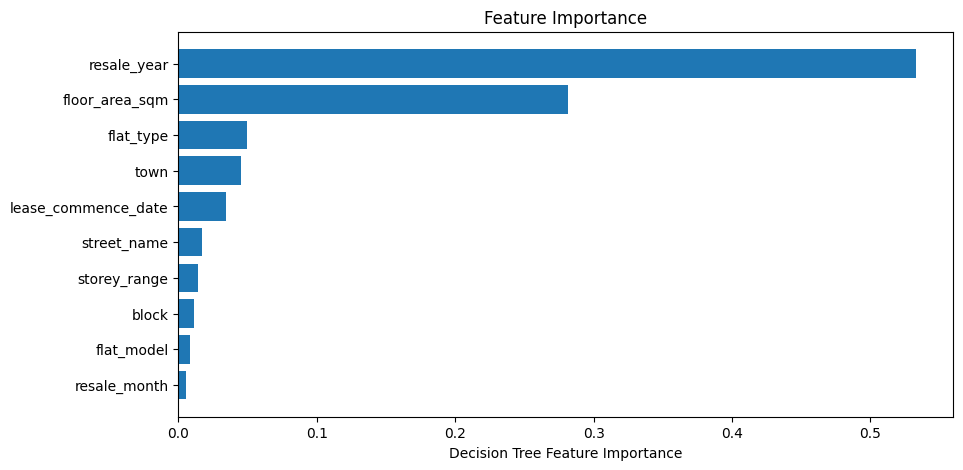

In [ ]:
sorted_idx = dtreg.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], dtreg.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")
plt.title("Feature Importance")

plt.show()

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9841872569926232


In [ ]:
#saving model
import pickle

file_random = r'G:\guvi\resaleflat\randomforest.pkl'
with open(file_random, 'wb') as file6:
    pickle.dump(rfr, file6)

In [ ]:
#saving compressed model
from joblib import dump
dump(rfr, r'G:\guvi\resaleflat\randomforest_jmodel.pkl', compress=9)

['G:\\guvi\\resaleflat\\randomforest_jmodel.pkl']

Hyperparameters Tuning for random forest

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rfr = RandomForestRegressor(max_depth = 24, max_features = "log2")

for n in [10, 20, 50,90,99]:
  rfr = RandomForestRegressor(n_estimators = n, max_depth = 24, max_features = "log2")
  cross_score = np.mean(cross_val_score(rfr, X_train, y_train, cv = 20))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.9802391997461337
N: 20, Cross-Val Score: 0.9816885959155919
N: 50, Cross-Val Score: 0.9825456509408308
N: 90, Cross-Val Score: 0.982828784793216
N: 99, Cross-Val Score: 0.982876694198897


In [ ]:
rfr = RandomForestRegressor(max_depth = 25, max_features = "log2")

for n in [10, 20, 50,90,99]:
  rfr = RandomForestRegressor(n_estimators = n, max_depth = 25, max_features = "log2")
  cross_score = np.mean(cross_val_score(rfr, X_train, y_train, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.9803867429548092
N: 20, Cross-Val Score: 0.9818982806843091
N: 50, Cross-Val Score: 0.9828534602089516
N: 90, Cross-Val Score: 0.9830715664315413
N: 99, Cross-Val Score: 0.9831393088460842


In [ ]:
rfr = RandomForestRegressor(max_depth = 30, max_features = "log2")

for n in [10,20,50,90,99]:
  rfr = RandomForestRegressor(n_estimators = n, max_depth = 30, max_features = "log2")
  cross_score = np.mean(cross_val_score(rfr, X_train, y_train, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.9809345075201931
N: 20, Cross-Val Score: 0.9825461993358857
N: 50, Cross-Val Score: 0.9834861823121877
N: 90, Cross-Val Score: 0.9837626397753005
N: 99, Cross-Val Score: 0.9837664020563859


In [ ]:
rfr = RandomForestRegressor(max_depth = 30, max_features = "log2")

for n in [100, 150]:
  rfr = RandomForestRegressor(n_estimators = n, max_depth = 30, max_features = "log2")
  cross_score = np.mean(cross_val_score(rfr, X_train, y_train, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 100, Cross-Val Score: 0.9837773515217758
N: 150, Cross-Val Score: 0.9839123419003662


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators = 150, max_depth = 30, max_features = "log2")
rfreg.fit(X_train, y_train)
y_pred = rfreg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.984231562972507


In [ ]:
#saving the tuned random forest model
import pickle

file_ranfor_hyp = r'G:\guvi\resaleflat\random_forest_hyp.pkl'
with open(file_ranfor_hyp, 'wb') as file7:
    pickle.dump(rfreg, file7)

In [ ]:
#saving the compressed model
from joblib import dump
file_randomhyp_comp= r'G:\guvi\resaleflat\randomforest_jmodel_hyp.pkl'
with open(file_randomhyp_comp,'wb') as f7:
    dump(rfreg,f7, compress=9)

Feature importance of RandomForest

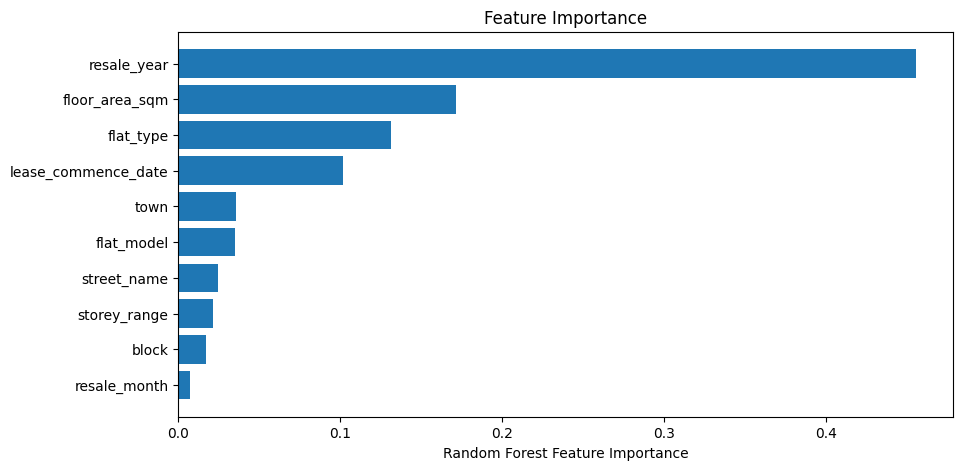

In [ ]:
sorted_idx =rfreg.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], rfreg.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()

Xgboost

In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9785522776299224


In [ ]:
#saving model
import pickle

file_xgb = r'G:\guvi\resaleflat\xgboostreg.pkl'
with open(file_xgb, 'wb') as file4:
    pickle.dump(xgbr, file4)

Hyperparameters Tuning for xgboost

In [ ]:
from xgboost import XGBRegressor

for lamb in [0,0.5,1,1.5]:
  xgbr = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(xgbr, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0, Cross-Val Score: -2.1430027056168476e-05
Lambda: 0.5, Cross-Val Score: 0.9803876352548061
Lambda: 1, Cross-Val Score: 0.9776611135979214
Lambda: 1.5, Cross-Val Score: 0.9594626591085532


In [ ]:
from xgboost import XGBRegressor

for lamb in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  xgbr = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(xgbr, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.1, Cross-Val Score: 0.9658351224550767
Lambda: 0.2, Cross-Val Score: 0.9761406283272451
Lambda: 0.3, Cross-Val Score: 0.9789283745317426
Lambda: 0.4, Cross-Val Score: 0.9799695408216375
Lambda: 0.5, Cross-Val Score: 0.9803876352548061
Lambda: 0.6, Cross-Val Score: 0.9804513957685183
Lambda: 0.7, Cross-Val Score: 0.9802685238411202
Lambda: 0.8, Cross-Val Score: 0.9800128161893726
Lambda: 0.9, Cross-Val Score: 0.9786616900063374


In [ ]:
from xgboost import XGBRegressor
xgbreg = XGBRegressor(learning_rate = 0.6)
xgbreg.fit(X_train, y_train)
y_pred = xgbreg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9798490335911281


Saving the tuned xgboost model

In [ ]:
import pickle

file_xgb_hyp = r'G:\guvi\resaleflat\xgboostreg_hyp.pkl'
with open(file_xgb_hyp, 'wb') as file5:
    pickle.dump(xgbreg, file5)

Feature importance of xgboost

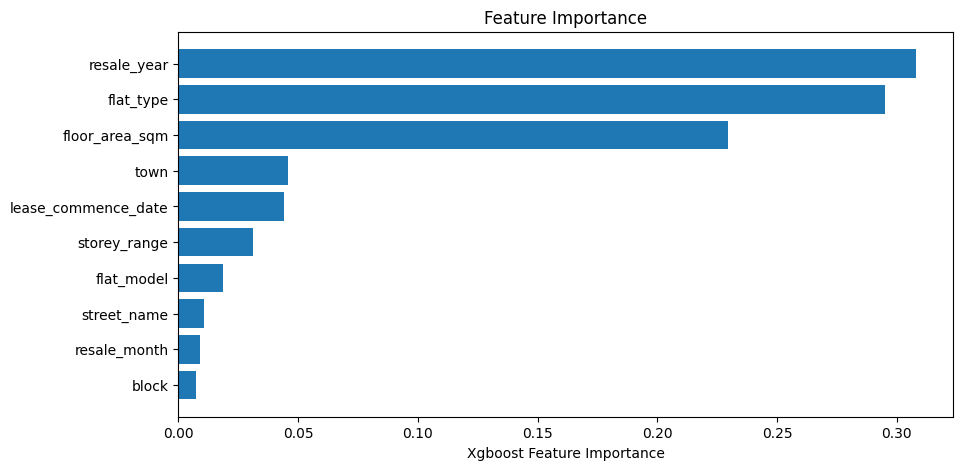

In [ ]:

sorted_idx = xgbreg.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], xgbreg.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.title("Feature Importance")

plt.show()

linear regression : 0.7801528825790175

decision tree : 0.9721506325933871

random forest : 0.984231562972507

xgboost :  0.9798490335911281

So the the best model is random forest 98% r2 score but I took xgboost model the second best model because random forest model is about 7.15 gb it takes more memory and time to load the model in streamlit so I choose xgboost.